In [1]:
import warnings
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(314093, 17)


In [3]:
used_features = [
    'street', 
    # 'street_number',
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city'
]

In [4]:
X = df[used_features]
y = df['final_price']


In [11]:
cities = ["באר שבע", "אשדוד", "חולון", "פתח תקווה"]
test_size = 0.3

cities = {city: {"processor": None, "algo": None} for city in cities}


באר שבע
(21686, 17)
(21686, 675)


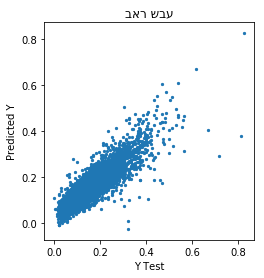

Mean squared error: 0.00
Mean squared error sqrt: 0.039023048818140296
Variance score: 0.78
אשדוד
(13601, 17)
(13601, 551)


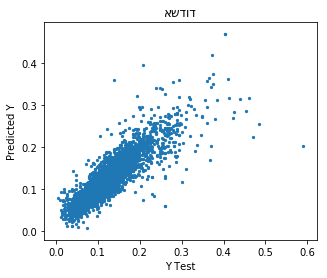

Mean squared error: 0.00
Mean squared error sqrt: 0.02853558910875362
Variance score: 0.76
חולון
(9946, 17)
(9946, 512)


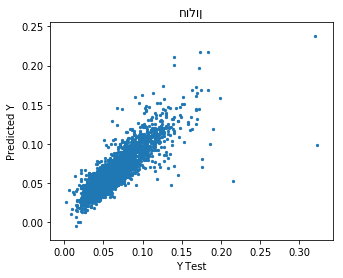

Mean squared error: 0.00
Mean squared error sqrt: 0.014480806601735953
Variance score: 0.74
פתח תקווה
(14333, 17)
(14333, 638)


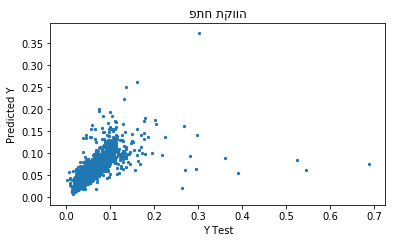

Mean squared error: 0.00
Mean squared error sqrt: 0.02190755304076178
Variance score: 0.45


In [6]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    print(X.shape)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

באר שבע
(21686, 8)
(21686, 675)
0.7687378122057738


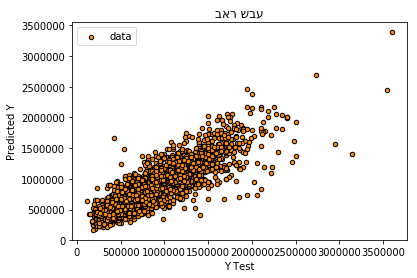

אשדוד
(13601, 8)
(13601, 551)
0.7560636719971249


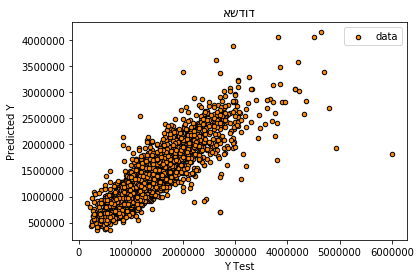

חולון
(9946, 8)
(9946, 512)
0.7314036694615448


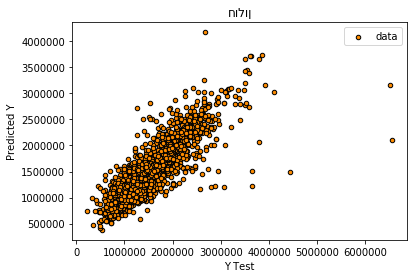

פתח תקווה
(14333, 8)
(14333, 638)
0.49190236429786094


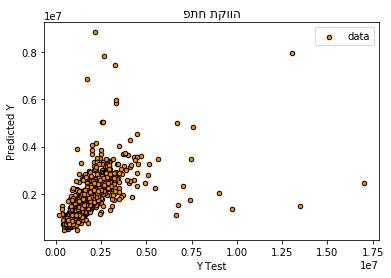

In [12]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    X = _df[used_features]
    y = _df['final_price']
    print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
    print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    # DecisionTreeRegressor
#     regr_1 = DecisionTreeRegressor(max_depth=5)
#     regr_1.fit(X_train, y_train)  
#     y_pred = regr_1.predict(X_test)
#     print(regr_1.score(X_test, y_test))
    
    
    clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))
    
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(city)
    plt.legend()
    plt.show()


In [13]:
df['property_type'].unique()


array(['דירה בבית קומות', 'דירת גג', 'דירת מגורים', 'בית בודד',
       "קוטג' חד משפחתי", "קוטג' דו משפחתי", 'דירת נופש', 'דירת גן'],
      dtype=object)

In [15]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    # 'street_number',
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': ["2015-01-01", "2019-01-01", "2010-01-01", "2016-01-01", "2019-01-01"],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred)


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2  2015-01-01   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10  2019-01-01   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2  2010-01-01   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2  2016-01-01   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2  2019-01-01   

   building_mr     city  
0          115  באר שבע  
1          116  באר שבע  
2          120  באר שבע  
3          120  באר שבע  
4          113  באר שבע  
[1172360.1286166   916525.73617404 1006271.64583498 1226347.25085603
 1253252.09117411]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


באר שבע
(21686, 17)
[ 110300.  371850.  456000.  536750.  620000.  700000.  775000.  870000.
 1020000. 1225000. 4340000.]
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       643
           1       0.35      0.37      0.36       661
           2       0.34      0.30      0.32       659
           3       0.32      0.34      0.33       643
           4       0.30      0.29      0.29       706
           5       0.33      0.28      0.30       540
           6       0.37      0.33      0.35       672
           7       0.35      0.34      0.35       657
           8       0.46      0.48      0.47       666
           9       0.66      0.74      0.70       659

   micro avg       0.41      0.41      0.41      6506
   macro avg       0.40      0.41      0.41      6506
weighted avg       0.40      0.41      0.41      6506

[[415 129  46  29  17   3   1   2   0   1]
 [152 243 105  83  40  21   9   8   0   0]
 [ 85 133 195 115  84  19  17   7